<center><h1><u>Project:- Retail Sales Time Series Prediction and Forecasting </center></h1></u>



The aim of this project is to forecast furniture sales using time series techniques.



In [1]:
#import libraries
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt



In [4]:
plt.rcParams 

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [5]:

#plt.style.use('fivethirtyeight')
plt.style.use('fivethirtyeight')
#set axes.labelsize to 14
plt.rcParams['axes.labelsize'] = 14
#set xtick.labelsize to 12
plt.rcParams['xtick.labelsize'] = 12
#set ytick.labelsize to 12
plt.rcParams['ytick.labelsize'] = 12
#set text.color to 'k'
plt.rcParams['text.color'] = 'k'

Dataset Link: https://drive.google.com/file/d/109apiSFgFA1gG6BXmS1QBLqYdWDDmMkE/view?usp=sharing. The data displays sales of furniture in various regions of USA. The columns present are [Row ID, Order ID,	Order Date,	Ship Date,	Ship Mode,	Customer ID,	Customer Name,	Segment,Country,	City,	State,	Postal Code,	Region,	Product ID,	Category,	Sub-Category,	Product Name,	Sales,	Quantity,	Discount,	Profit]. Get the url of the dataset and read it using pandas.read_csv method. parse dates based on 'Order Date' column. Setting encoding to 'unicode_escape'.Refer:https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [6]:
#get the dataset path

#read the data
raw_data = pd.read_csv('C:/Users/KIIT/Desktop/Data Science Exercise/CloudyML/Assignments/2. ML for Data Science/Datasets/superstore.csv', encoding= 'unicode_escape', parse_dates = ['Order Date'])
df = raw_data.copy()
df
#print first 5 rows


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


The dataset consists of both categorical as well as continuous variables. Lets describe it using describe method.

In [7]:
#describe the dataset
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

We need only the dates and sales on that particular date for forecasting the sales. Hence we drop all the other columns.

In [9]:
#take all the columns names in a list
df = df[['Order Date', 'Sales']]
#drop the above columns keeping axis 1
df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)
#print first 5 rows
df.head()

<ipython-input-9-327a290a7aa9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)


,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


Let's now arrange the data sorting it based on Order Date using sort_values function. Check whether there are any missing values using isnull and sum functions.



In [10]:
# Sort the Order Date 
df = df.sort_values('Order Date')
#print the first row of sorted values
print(df.head(1))
#check any missing values
df.isnull().sum()

     Order Date   Sales
7980 2014-01-03  16.448


Order Date    0
Sales         0
dtype: int64

There are no missing values, hence we can proceed further. 
<br><br> In the next step we group the sales based on order date i.e. we sum up the sales recorded on the same day. Do this by using the groupby, sum and reset_index function.

In [11]:
# grouping sales according to Order Date
#furniture.groupby('Order Date')['Sales'].sum().reset_index()
df.groupby('Order Date')['Sales'].sum().reset_index()
print(df['Order Date'].min(), df['Order Date'].max())

# min and max values of Order Date



2014-01-03 00:00:00 2017-12-30 00:00:00


Next set the 'Order Date' column as index column using set_index method.

In [12]:
#set 'Order Date' as index
df = df.set_index('Order Date')
#furniture.index
print(df.head(1))
df.index

             Sales
Order Date        
2014-01-03  16.448


DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-30',
               '2017-12-30', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [13]:
df

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,11.784
2014-01-04,272.736
2014-01-04,3.540
2014-01-05,19.536
...,...
2017-12-30,3.024
2017-12-30,52.776
2017-12-30,90.930


Next average the daily sales value for each month, use start of each month as the timestamp. Use the resample method and mean method to do so. resample() is a Convenience method for frequency conversion and resampling of time series. https://www.geeksforgeeks.org/python-pandas-dataframe-resample/. Pass the value 'MS' to resample method to get month start frequency. Apply mean function ahead.



In [14]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = df['Sales'].resample('MS').mean()

y['2017':]


Order Date
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    179.909045
2017-05-01    182.897150
2017-06-01    216.251942
2017-07-01    200.285027
2017-08-01    289.545358
2017-09-01    191.430614
2017-10-01    260.996387
2017-11-01    258.056264
2017-12-01    181.448742
Freq: MS, Name: Sales, dtype: float64

Plot the resampled data using plot function of matplotlib.

<AxesSubplot:xlabel='Order Date'>

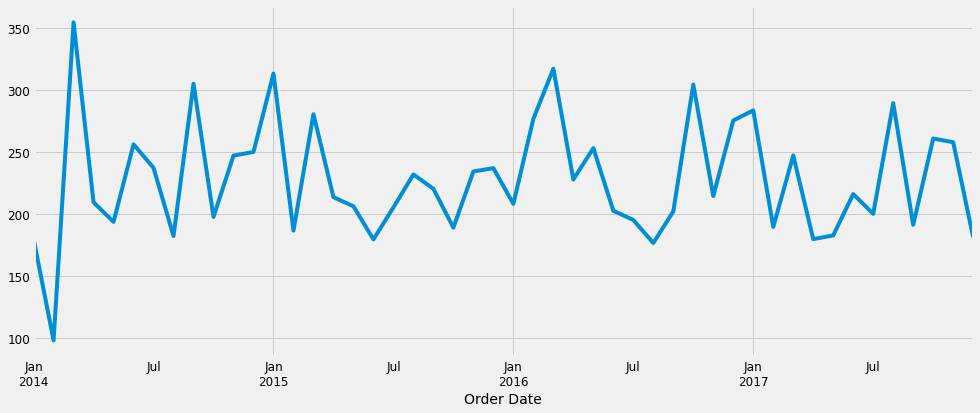

In [15]:
#plot graph 
y.plot(figsize = (15, 6))



Now lets decompoe our data into its various components like trend, seasonality and residual. Use the sm.tsa.seasonal_decompose to do so. Refer: https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html. Give 'additive' value to model parameter. Plot the decomposition

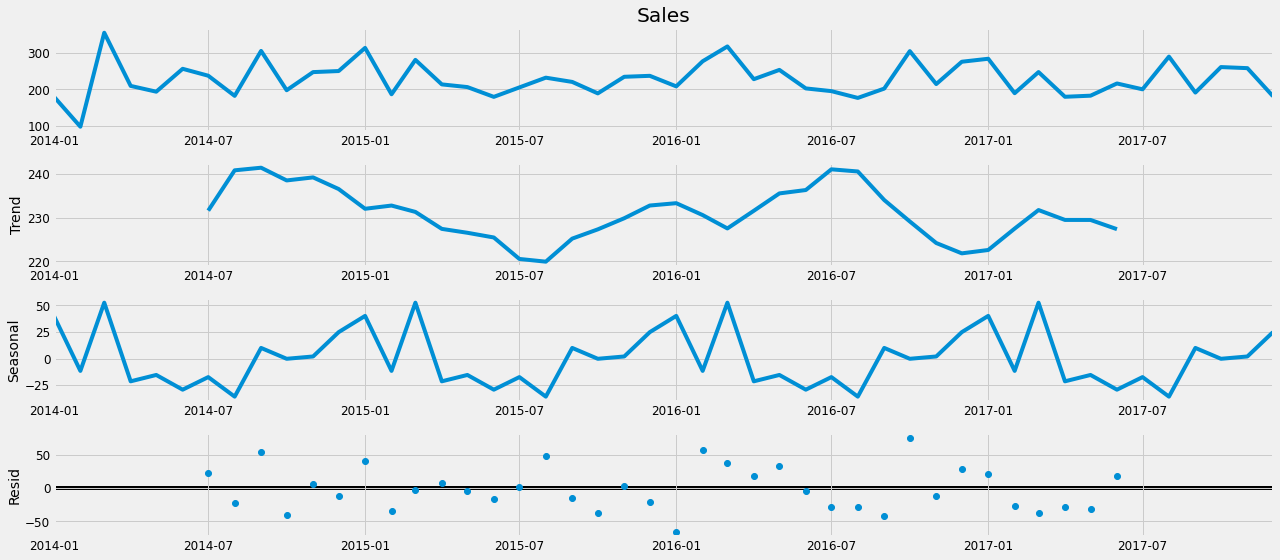

In [16]:
from pylab import rcParams
#
rcParams['figure.figsize'] = 18, 8

from statsmodels.tsa.seasonal import seasonal_decompose
#decompose the data
x = seasonal_decompose(y, model = 'additive')
#plot the decomposed data
fig = x.plot()
#show the plot
plt.show()

Next we create a list for p,d,q values.
* p: order of Autoregressive model (AR model)
* d: no. of differencing required for stationary data
* q: order of Moving Average model (MA model)

Consider these values in the range 0 to 2(exclusive) using range function. Use itertools to get product of p,d,q which means creates combinations of p,d,q. Refer: https://docs.python.org/3/library/itertools.html. Create a list having all these values along with seasonality as 12.

In [17]:
# set the typical ranges for p, d, q
p = d = q = range(0,2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))

#create new list using list comprehension
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]


#print some of the combination examples
seasonal_pdq



[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [18]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

After getting combinations of parameters, we need to find the best set of parameters. To achieve this, we use grid search method. Grid search builds a model for every combination of hyperparameters specified and evaluates each model. This helps in selecting the best parameters.

Apply the sm.tsa.statespace.SARIMAX to the data by specifying all combinations of parameters one by one. We have already covered an assignment on SARIMAX(Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model). Refer: https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html. 

In [19]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:#iterate through pdq

    #iterate through seasonal_pdq
    for param_seasonal in seasonal_pdq:
        try:
            sarimax_model = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 

            #fit the model
            sarimax_results = sarimax_model.fit()
            #print the results, 
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, sarimax_results.aic))

        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:661.5238453481245
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2369.6923820077486
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:402.0746678479151


D:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
D:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:396.82026498081274
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:568.0812131274236
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:563.3702897145336
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:395.73870136529877
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:397.7103607987697
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:624.7073376670504


D:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2418.5315923184603
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:404.0572383632097
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:398.30739030836963
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:565.8511874273034
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:563.464111373795
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:397.2652484384022
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:399.11662450994373
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:539.8605974537222


D:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1969.9345154853513
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:413.4421987152164
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:411.7711868200504
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:540.1473655055303


D:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1534.136837960355
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:411.15022416011413
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:413.034961888302
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:505.2494190718207
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1908.6139704004563
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:397.566461083973
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:393.2311417946076
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:507.0099455851304


D:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1856.0389583150456
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:392.0933287553417
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:394.0906684752914
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:553.9945048917214


D:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2350.703863757338
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:404.06203007561726
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:398.3808815178701
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:552.9272857949778
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:553.5803860727437
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:397.27571034278503
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:399.14714147390936


D:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:520.9342268479052


D:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2384.7188616630656
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:405.5034128344975
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:397.0752637441512


D:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:522.7098070062195
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:524.8082277556713
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:396.08182424063233
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:397.9267379168033
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:519.8818905467397


D:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1895.5554351042576
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:408.0593708056986
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:402.67176668680054
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:521.8609414870076


D:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1743.1755321341711
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:399.85308065729896
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:401.4986580954854
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:505.5628866933252


D:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2261.43546702527
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:399.56190080712366
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:395.02518862607366
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:507.52247737023737
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:393.8481987643729
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:395.81171398707346


Check for parameters that give the lowest AIC Score. Use these parameters to train the final model.

In [20]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)
#train model
model = sm.tsa.statespace.SARIMAX(y, order = (1,1,1), seasonal_order = (1,1,0,12))

#fit the model
model_fit = model.fit()
#print first summary table
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -192.924
Date:                             Thu, 28 Jul 2022   AIC                            393.848
Time:                                     11:26:04   BIC                            400.070
Sample:                                 01-01-2014   HQIC                           395.996
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0913      0.286     -0.319      0.750      -0.651       0.469
ma.L1         -0.9982      9.598     -0.104      0.917     -19.810      17.813
ar.S.L12      -0.5598      0.156     -3.594      0.000      -0.865      -0.254
sigma2      2799.1394   2.67e+04      0.105      0.917   -4.95e+04    5.51e+04
===================================================================================
Ljung-Box (Q):                       36.64   Jarque-Bera (JB):                 4.86
Prob(Q):                              0.35   Prob(JB):                         0.09
Heteroskedasticity (H):               0.70   Skew:                             0.75
Prob(H) (two-sided):                  0.54   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Next get the predictions from date '2017-01-01'. Use the get_prediction function. Pass the value pd.to_datetime('2017-01-01') to the start parameter, keep dynamic as False.
Refer: https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_prediction.html

In [21]:
#get the predictions
predictions = model_fit.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
#get confidence range using conf_int()
conf_range = predictions.conf_int()
#print the confidence range
print(conf_range)

            lower Sales  upper Sales
Order Date                          
2017-01-01   166.949827   380.855436
2017-02-01   128.374775   341.873716
2017-03-01   201.126553   414.265417
2017-04-01   122.357190   335.174996
2017-05-01   126.153429   338.683181
2017-06-01    87.013280   299.283141
2017-07-01    92.953015   304.987212
2017-08-01   102.323358   314.142883
2017-09-01   103.098058   314.721218
2017-10-01   139.372346   350.815202
2017-11-01   122.030717   333.307438
2017-12-01   150.521234   361.644384


Its time to visualize our predicted data.

In [22]:
conf_range.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')

<ipython-input-23-cfa3f190f9c3>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


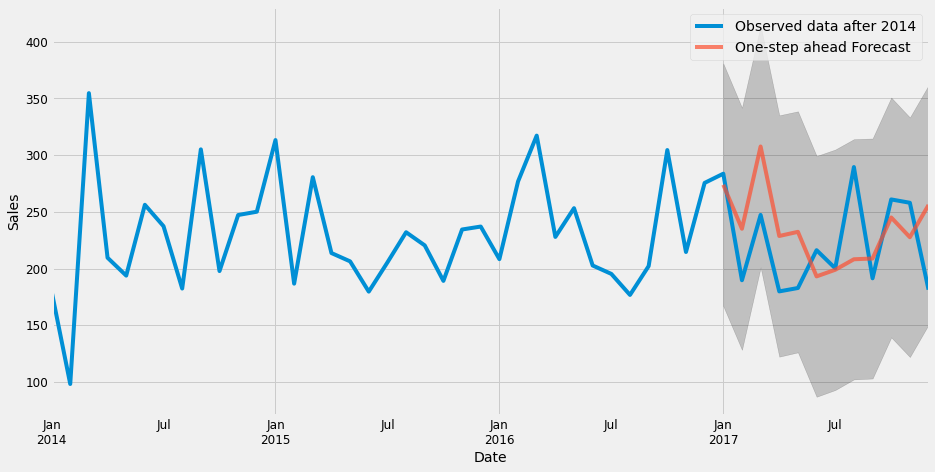

In [23]:
#Visualize the forecasting
#plot observed data after 2014
y.plot(label = 'Observed data after 2014')
#plot predicted data,
ax = plt.subplot(111)
predictions.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))

#fill area between confidence range, 
ax.fill_between(conf_range.index, conf_range.iloc[:, 0], conf_range.iloc[:, 1], color = 'k', alpha = 0.2)

#set x label
plt.xlabel('Date')
#set y label
plt.ylabel('Sales')
#set legend and show
plt.legend()
plt.show()


Next cjeck the evaluation scores like Squared mean error and root mean squared error.

In [24]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
#get prediction mean using prediction_mean
y_hat = predictions.predicted_mean
y_truth = y['2017-01-01':]


#calculate mse,
mse = ((y_hat - y_truth) ** 2).mean()

#take square root of mse to get rmse
rmse = np.sqrt(mse)
#print both mse and rmse
print("MSE is : ", str(mse),"RMSE is : ", str(rmse))


MSE is :  2069.5841025328027 RMSE is :  45.49268185689653


Now forecast the out sample data and plot it. use get_forecast on result to get the forecasted values. Refer:https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_forecast.html. 

<ipython-input-25-465093582a69>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


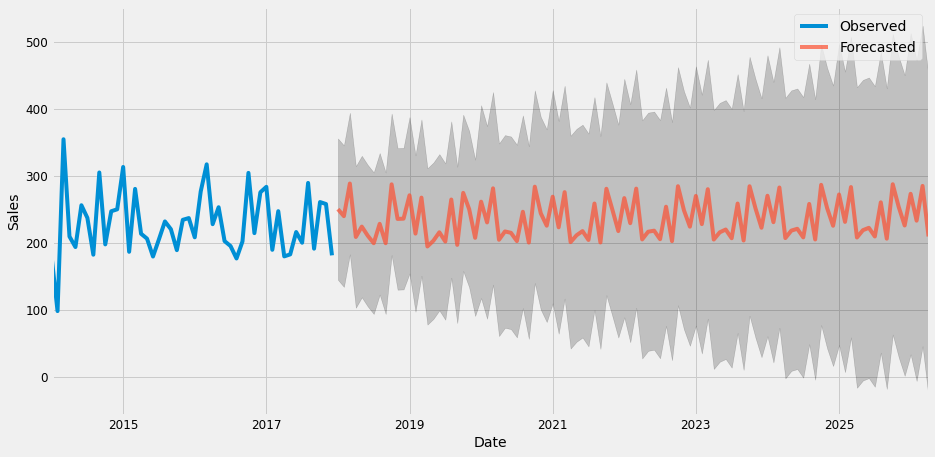

In [25]:
# forcasting for out of sample data
#get forecasted data for 100 steps
forecast = model_fit.get_forecast(steps = 100)
#get confidence range
conf_range_fore = forecast.conf_int()
#plot observed data
y.plot(label = 'Observed')
#plot predicted data
ax = plt.subplot(111)
forecast.predicted_mean.plot(ax = ax, label = 'Forecasted', alpha = 0.7, figsize = (14, 7))
#fill area between confidence range
ax.fill_between(conf_range_fore.index, conf_range_fore.iloc[:, 0], conf_range_fore.iloc[:, 1], color = 'k', alpha = 0.2)
plt.xlabel('Date')
#set y label
plt.ylabel('Sales')
#set legend and show
plt.legend()

plt.show()

Our model clearly captured furniture sales seasonality.
As we forecast further out into the future we can still be uncertain of the accuracy.
This uncertainty is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.